# Train a regressor model and test its performance

In [2]:
import Astraea
import pandas as pd
import numpy as np

### Generate random training/testing set

In [3]:
# create random feature matrix with 20 features and 5000 total data points
X=np.random.rand(5000,20)

# create labels from features
y=sum([X[:,i]*np.random.rand(1) for i in range(np.shape(X)[1])])

# put features and labels into one pandas dataFrame
X_y=pd.DataFrame(np.hstack((X,np.reshape(y,(5000,1)))),columns=np.append(['X'+str(i) for i in range(np.shape(X)[1])],['y']))

# assign random errors
X_y['y_err']=np.random.rand(5000)

X_y

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X12,X13,X14,X15,X16,X17,X18,X19,y,y_err
0,0.265702,0.271948,0.538734,0.765662,0.386486,0.248067,0.147143,0.219609,0.205311,0.113754,...,0.685618,0.803574,0.237978,0.853627,0.585296,0.842059,0.674527,0.701996,4.853710,0.022722
1,0.504384,0.232737,0.001053,0.794270,0.431499,0.028129,0.371415,0.137736,0.764918,0.699156,...,0.603349,0.647880,0.617722,0.047965,0.348425,0.059367,0.210913,0.541740,3.865669,0.333622
2,0.423616,0.023076,0.469680,0.576176,0.726094,0.719282,0.442522,0.459203,0.560474,0.299662,...,0.701959,0.591504,0.190518,0.604745,0.623998,0.590793,0.740864,0.451863,5.093289,0.824992
3,0.999646,0.579761,0.216035,0.689036,0.525710,0.685448,0.643805,0.186609,0.440171,0.309704,...,0.473227,0.613621,0.462776,0.764452,0.530968,0.810589,0.990396,0.098113,5.841591,0.844040
4,0.339142,0.435149,0.766738,0.319713,0.743703,0.243482,0.577296,0.248217,0.780977,0.872960,...,0.443445,0.081284,0.412471,0.657811,0.005989,0.956993,0.522537,0.187135,5.034584,0.133645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.219719,0.753114,0.855872,0.168389,0.337001,0.382008,0.387196,0.411587,0.866540,0.140304,...,0.464783,0.778651,0.396260,0.303297,0.096156,0.328863,0.588296,0.924350,5.535405,0.643922
4996,0.843950,0.150927,0.777027,0.539370,0.480492,0.710721,0.918290,0.077702,0.969882,0.998204,...,0.219206,0.213696,0.370958,0.738922,0.799213,0.735384,0.303247,0.795158,6.081854,0.289466
4997,0.812974,0.893340,0.522742,0.009560,0.435794,0.161567,0.192200,0.368866,0.040532,0.288920,...,0.665221,0.351803,0.265456,0.583188,0.329351,0.216492,0.744034,0.201097,4.203970,0.235565
4998,0.882289,0.737069,0.312521,0.793096,0.723980,0.607374,0.089151,0.393205,0.773874,0.396739,...,0.150428,0.765187,0.017116,0.530699,0.161819,0.950644,0.277289,0.638556,5.672640,0.025569


### Train regressor model with 3 estimators to minimize varience

In [4]:
# train the model with default settings
regr,regr_outs=Astraea.RFregressor(X_y,['X'+str(i) for i in range(np.shape(X)[1])],target_var='y',target_var_err='y_err',n_estimators=3)

Simpliest example:
 regr,importance,actrualF,ID_train,ID_test,predictp,ave_chi,MRE_val,X_test,y_test,X_train,y_train = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 20
Features attempt to train: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19']
ID column not found, using index as ID!
5000 stars in dataframe!
5000 total stars used for RF!
4000 training stars!
Finished training! Making predictions!
Finished predicting! Calculating statistics!
Median Relative Error is: 0.06100756908734846
Average chi^2 is: 1.948550848964471
Finished!


### Output discription see https://astraea.readthedocs.io/en/latest/user/api.html

In [5]:
regr_outs

importance    [0.036122854633478245, 0.04419061114455444, 0....
actrualF      [X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, ...
ID_train      [2309, 1053, 1607, 630, 4044, 2742, 663, 4140,...
ID_test       [4, 5, 9, 10, 11, 26, 28, 29, 30, 35, 44, 46, ...
prediction    [4.904567780475959, 5.033519317545807, 4.86137...
ave_chi2                                                1.94855
MRE                                                   0.0610076
X_test        [[0.33914215564519223, 0.43514936682507255, 0....
y_test        [5.034583517579125, 5.10913131159107, 5.570106...
X_train       [[0.9271655365057182, 0.3001799909359174, 0.98...
y_train       [5.5304392339318875, 5.589154403255157, 5.7260...
dtype: object

### Plot importance and Predicted vs True

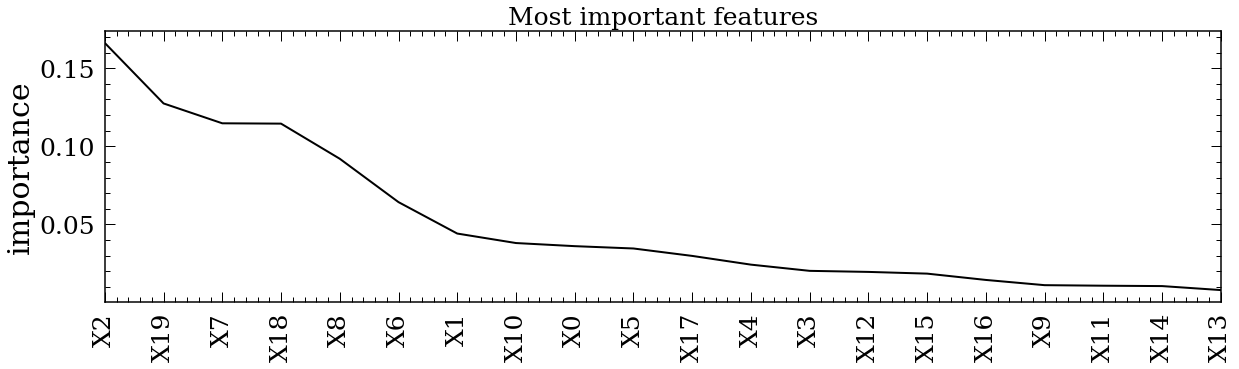

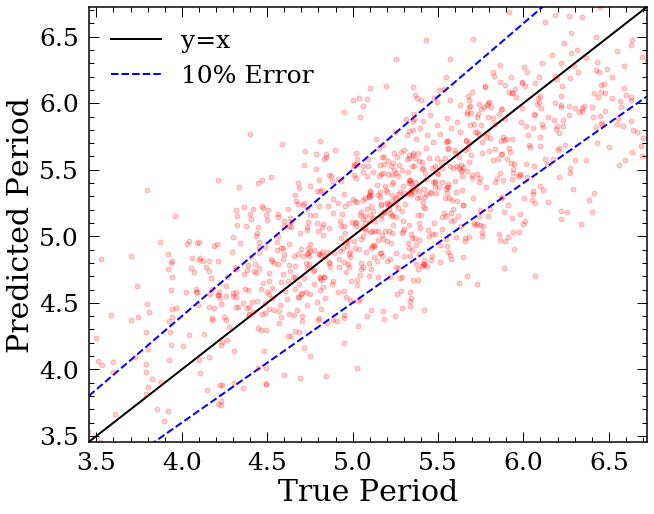

In [6]:
# plot cross-validation result 
Astraea.plot_result(regr_outs['actrualF'],regr_outs['importance'],regr_outs['prediction'],regr_outs['y_test'],labelName='y',MS=10)